# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [747]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [748]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,"социальный статус клиента относительно работы (1 - работает, 0 - не работает)"
3,SOCSTATUS_PENS_FL,"социальный статус клиента относительно пенсии (1 - пенсионер, 0 - не пенсионер)"
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [749]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [750]:
df_train.shape

(15223, 52)

In [751]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [752]:
df_test.shape

(14910, 52)

In [753]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,8000,6,8650,0,1,220,18.0,0,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,21650,6,4000,0,1,137,97.0,1,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,33126,12,4000,0,1,251,84.0,0,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8491,82",6,5000,0,0,36,168.0,1,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,21990,12,4000,0,1,83,101.0,1,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [754]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [755]:
df = df_test.append(df_train).reset_index(drop=True)

In [756]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,Образование,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,7000,Красноярский край,Красноярский край,Красноярский край,Красноярский край,ВОСТОЧНО-СИБИРСКИЙ,0,1,0,0,1,1,0,0,0,0,0,0,"3016,8",5,"335,2",0,0,96,39.0,1,0,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,NaN,NaN,NaN,NaN,NaN,от 10000 до 20000 руб.,4100,Орловская область,Орловская область,Орловская область,Орловская область,ЦЕНТРАЛЬНЫЙ 1,1,1,1,1,1,0,0,0,1,0,1,0,6000,6,2000,0,1,299,NaN,0,0,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,40000,Коми,Коми,Коми,Коми,ЦЕНТРАЛЬНЫЙ 2,1,1,1,1,1,0,1,1,0,0,0,0,10000,6,2490,0,0,19,156.0,1,0,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,Другие сферы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,20000,Читинская область,Читинская область,Читинская область,Читинская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,1,0,0,0,0,0,0,5175,4,575,0,0,252,9.0,1,0,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,Образование,Специалист,Государственная комп./учреж.,Без участия,Вспомогательный техперсонал,от 20000 до 50000 руб.,17000,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,ДАЛЬНЕВОСТОЧНЫЙ,1,1,1,1,1,0,0,0,0,0,0,0,13065,6,10000,0,0,36,84.0,0,0,1,1,1,5,0,0,0,0,NaN,test


In [757]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [758]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.
Давайте выведем эти значения для каждого столбца

In [759]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Неоконченное высшее', 'Среднее', 'Среднее специальное', 'Ученая степень', 'Два и более высших образования', 'Высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Не состоял в браке', 'Состою в браке', 'Разведен(а)', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Металлургия/Промышленность/Машиностроение', 'Информационные технологии', 'Страхование', 'Логистика', 'Информационные услуги', 'Маркетинг', 'Банк/Финансы', 'Транспорт', 'Сельское хозяйство', 'ЧОП/Детективная д-ть', 'Химия/Парфюмерия/Фармацевтика', 'Государственная служба', 'Образование', 'Другие сферы', 'Сборочные производства', 'Недвижимость', 'Наука', 'Строительство', 'Энергетика', 'Управляющая компания', 'Торговля', 'Ресторанный бизнес/Общественное питание', 'Салоны красоты и здоровья', 'Здравоохранение', 'Юридические услуги/нотариальные услуги', 'Туризм', 'СМИ/Реклама/PR-агенства', 'Коммунальное хоз-во/Дорожные службы', 'Нефтегазовая промышленность', 'Подбор персонала', 'Развлечения/Искусство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [ ]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
В данных есть пропуски:

GEN_INDUSTRY                  27420 non-null object не заполнен у неработающих: Заполним значением "---"
GEN_TITLE                     27420 non-null object не заполнен у неработающих: Заполним значением "Неработающий"
ORG_TP_STATE                  27420 non-null object не заполнен у неработающих: УДАЛИМ (не влияет на отклик)
ORG_TP_FCAPITAL               27425 non-null object не заполнен у неработающих: УДАЛИМ (не влияет на отклик)
JOB_DIR                       27425 non-null object не заполнен у неработающих: УДАЛИМ (не влияет на отклик)

TP_PROVINCE                   29543 non-null object УДАЛИМ (не влияет на отклик)
REGION_NM                     30131 non-null object УДАЛИМ (не влиет на отклик)

WORK_TIME                     27416 non-null float64 - Значение NaN у всех неработающих и у одного работающего - Заполним 0.

PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64  - Заполнен только на 2% - исключим из анализа. 

FACT_LIVING_TERM              30133 non-null int64 - в столбце есть выброс: значение (-26). Заменим его на 0.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
В данных есть категориальные признаки:
    
EDUCATION                     30133 non-null object Label-Encoding
MARITAL_STATUS                30133 non-null object OHE
GEN_INDUSTRY                  27420 non-null object OHE
GEN_TITLE                     27420 non-null object OHE
ORG_TP_STATE                  27420 non-null object УДАЛИМ
ORG_TP_FCAPITAL               27425 non-null object УДАЛИМ
JOB_DIR                       27420 non-null object УДАЛИМ
FAMILY_INCOME                 30133 non-null object Label-Encoding
REG_ADDRESS_PROVINCE          30133 non-null object УДАЛИМ
FACT_ADDRESS_PROVINCE         30133 non-null object OHE
POSTAL_ADDRESS_PROVINCE       30133 non-null object УДАЛИМ
TP_PROVINCE                   29543 non-null object УДАЛИМ
REGION_NM                     30131 non-null object УДАЛИМ

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [760]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    ## Your Code Here
   

    # Удаляла идентификатор AGREEMENT_RK
    df_output.drop('AGREEMENT_RK', axis=1, inplace=True)

    # Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    a=['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for i in a:
        df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float')

    # Что-то делала с пропусками:
    # 1) FACT_LIVING_TERM (-26) заменим на 0:
    df_output['FACT_LIVING_TERM'].replace(-26, 0, inplace=True)

    # 2) Исключим из анализа столбцы с пропусками, которые не влияют на отклик:
    df_output.drop(['PREVIOUS_CARD_NUM_UTILIZED', 'REGION_NM', 'TP_PROVINCE', 'JOB_DIR', 'ORG_TP_FCAPITAL', 'ORG_TP_STATE'], axis=1, inplace=True)

    # 3) Заполним недостающие значения:
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(0)
    df_output['GEN_TITLE'] = df_output['GEN_TITLE'].fillna('Неработающий')
    df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].fillna('---')

    # Кодировала категориальные признаки:

    # 1) LABEL-ENCODING:
    dict_EDUCATION={'Неполное среднее':0, 'Среднее':1, 'Среднее специальное':2, 'Неоконченное высшее':3, 'Высшее':4, 'Два и более высших образования':5, 'Ученая степень':6}
    df_output['EDUCATION_LE'] = df_output['EDUCATION'].map(dict_EDUCATION)

    dict_FAMILY_INCOME={'до 5000 руб.':0, 'от 5000 до 10000 руб.':1, 'от 10000 до 20000 руб.':2, 'от 20000 до 50000 руб.':3, 'свыше 50000 руб.':4}
    df_output['FAMILY_INCOME_LE'] = df_output['FAMILY_INCOME'].map(dict_FAMILY_INCOME)

    df_output.drop(['EDUCATION', 'FAMILY_INCOME'], axis=1, inplace=True)

    # 2) OHE:
    df_output = pd.get_dummies(df_output, columns=['MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'FACT_ADDRESS_PROVINCE']) 

    # Удалим еще некоторые категориальные признаки 
    df_output.drop(['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE'], axis=1, inplace=True)
    
        
    return df_output

In [761]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [762]:
X = df_train_preproc.drop('TARGET', axis=1)
X_test = df_test_preproc.drop('TARGET', axis=1)
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [763]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
## Your Code Here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [764]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test)
predict_p_dtc = dtc.predict_proba(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)
predict_p_rfc = rfc.predict_proba(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
predict_p_lr = lr.predict_proba(X_test)

In [765]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print ('DecisionTreeClassifier metrics:')
accuracy_dtc = accuracy_score(y_test, predict_dtc)
print('accuracy', accuracy_dtc)
precision_dtc = precision_score(y_test, predict_dtc)
print('precision', precision_dtc)
recall_dtc = recall_score(y_test, predict_dtc)
print('recall', recall_dtc)

print('---------------')

print ('RandomForestClassifier metrics:')
accuracy_rfc = accuracy_score(y_test, predict_rfc)
print('accuracy', accuracy_rfc)
precision_rfc = precision_score(y_test, predict_rfc)
print('precision', precision_rfc)
recall_rfc = recall_score(y_test, predict_rfc)
print('recall', recall_rfc)

print('---------------')

print ('LogisticRegression metrics:')
accuracy_lr = accuracy_score(y_test, predict_lr)
print('accuracy', accuracy_lr)
precision_lr = precision_score(y_test, predict_lr)
print('precision', precision_lr)
recall_lr = recall_score(y_test, predict_lr)
print('recall', recall_lr)

DecisionTreeClassifier metrics:
accuracy 0.798773812131
precision 0.182926829268
recall 0.189189189189
---------------
RandomForestClassifier metrics:
accuracy 0.875191591855
precision 0.105263157895
recall 0.0036036036036
---------------
LogisticRegression metrics:
accuracy 0.877819137289
precision 0.285714285714
recall 0.0036036036036


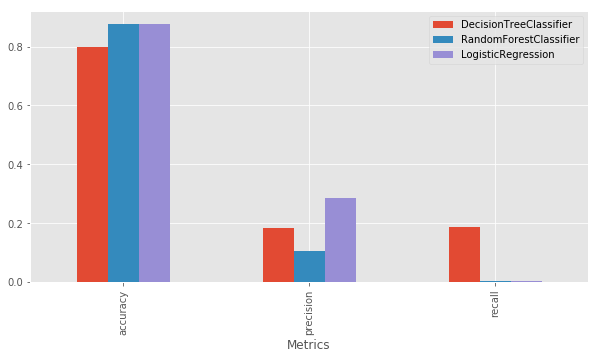

In [771]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

metrics=pd.DataFrame([['accuracy', accuracy_dtc, accuracy_rfc, accuracy_lr], 
                 ['precision', precision_dtc, precision_rfc, precision_lr], 
                 ['recall', recall_dtc, recall_rfc, recall_lr]], 
                columns=['Metrics','DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression'])

%matplotlib inline
from matplotlib import pyplot as plt

_, ax = plt.subplots(figsize=(10,5))
metrics.plot(x='Metrics', kind = 'bar', ax=ax);

DecisionTreeClassifier roc_auc: 0.536144943548
RandomForestClassifier roc_auc: 0.597248345055
LogisticRegression     roc_auc: 0.636862385816


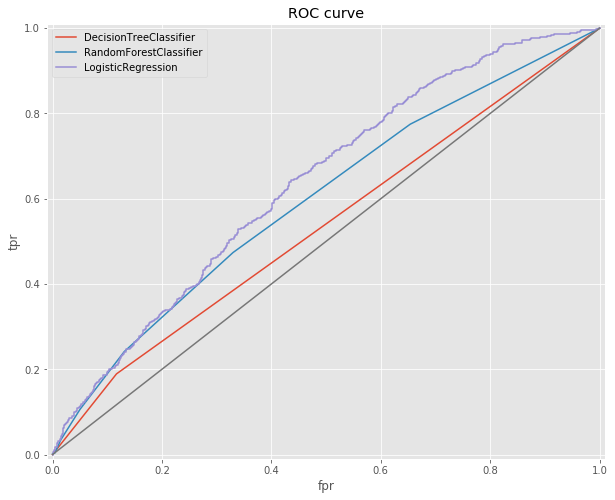

In [772]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here

from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_p_dtc[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_p_rfc[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, predict_p_lr[:,1])

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='DecisionTreeClassifier')
plt.plot(fpr2, tpr2, label='RandomForestClassifier')
plt.plot(fpr3, tpr3, label='LogisticRegression')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.legend()
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('DecisionTreeClassifier roc_auc:', roc_auc_score(y_test, predict_p_dtc[:,1]))
print('RandomForestClassifier roc_auc:', roc_auc_score(y_test, predict_p_rfc[:,1]))
print('LogisticRegression     roc_auc:', roc_auc_score(y_test, predict_p_lr[:,1]))

In [773]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
print('DecisionTreeClassifier ROC_AUC: {}'.format(np.mean(
    cross_val_score(DecisionTreeClassifier(), X.values, y.values, scoring='roc_auc', cv=StratifiedKFold().split(X.values, y.values)))))

print('RandomForestClassifier: {}'.format(np.mean(
    cross_val_score(RandomForestClassifier(), X.values, y.values, scoring='roc_auc', cv=StratifiedKFold().split(X.values, y.values)))))

print('LogisticRegression ROC_AUC: {}'.format(np.mean(
    cross_val_score(LogisticRegression(), X.values, y.values, scoring='roc_auc', cv=StratifiedKFold().split(X.values, y.values)))))

DecisionTreeClassifier ROC_AUC: 0.5252771012923105
RandomForestClassifier: 0.5965888139751491
LogisticRegression ROC_AUC: 0.6370735206324397


In [774]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

## Your Code Here

X_test = df_test_preproc.drop('TARGET', axis=1)
y_test = df_test_preproc['TARGET']

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_p_lr = lr.predict_proba(X_test)

In [775]:
# Померить roc_auc на тесте

print('test-выборка: roc_auc:', roc_auc_score(y_test, predict_p_lr[:,1]))

test-выборка: roc_auc: 0.619645288754
